# 用Python进行数据分析
By 高朴远

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


先引入pylab环境,此行命令是IPython的专有命令,并非Python所有.

## 1.Python简明教程

本节不会详细讲解Python的语法教程, 旨在为那些想"加载点数据, 做点计算, 再画点图" 的使用者提供一份语言精要.
如果你想详尽的学习Python或者了解一些细节, 可以去查看Python的官方教程:(http://docs.python.org). 

如果仅仅想使用Python进行高效的数据分析工作, 完全没有必要非成为Python专家不可, 熟悉数据处理的几个工具和相关类型, 函数以及方法即可. 

+ Python是一种解释性语言

类似于matlib或者mathmatica这样的软件, Python也是一种可以在一个交互式的解释器(类似于mathmaica打开的界面)键入一行行的命令来执行的语言. 在安装好Python的电脑上打开Python解释器, 其交互页面如下:

-----    
```python
Python 2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2] on linux2
Type "help", "copyright", "credits" or "license" for more information.
>>> 
```

---


> PS: 强烈建议在Windows上安装Python科学运算集成包, 如:Python(x,y), **Anaconda**. 


在上面的 `>>>` 后面就是要输入命令的地方.

在实际使用中,科学运算工作者更倾向于使用Ipython, 这是一个增强版的解释器, 提供了类似于mathmatica的输入界面以及代码补全等很多方面的功能.

+ 使用缩进, 而非"{}".

Python是通过缩进来组织代码的(制表符或者空格), 不想其他的语言(如:R, C++, JAVA, Perl) 用的是大括号. 以for循环为例:

---
```python
for x in array:
    if x < pivot:
        less.append(x)
    else:
        greater.append(x)
```
---

这种行为是强制的, 如果没有进行正确的缩进, 就会在执行时出现错误. 
这么做的好处是可以代码在写出来时就具有层次感, 更加易于阅读和分享, 这也是Python现在越来流行的原因之一. 

> PS: 强烈建议使用4个空格作为默认的缩减量,事实上这已经成为了一种标准. 大部分文本编辑器都支持将Tab键替换为4个空格.

+ 万物皆对象

Python中的任何数值, 字符串, 数据结构, 函数, 类, 模块, 都是以Python对象的形式存在的, 这就提供了一致性, 使得Python在使用时非常灵活.(关于对象的概念,请查阅有关OOP(面向对象编程)的资料. 

+ 注释

Python使用井号(#)号作为注释提示符, 任何前缀为#的文本都会被忽略掉. 这不仅在标注信息时有用, 在debug时也很有用.

+ 函数的调用和对象方法的调用

函数调用需要使用函数名+()的形式, 例如:

---
```python
def sum(a,b):   #函数定义
    return a+b
sum(1,2)  #函数调用,return 3.
```
---

Python中的所有函数对象都具有一些附属的属性或者方法(也就是函数), 这些都可以通过点运算符(.)来获取或者调用. 例如:

---
```python
obj.some_method(x, y, z)  #对象方法的调用
```
---

+ 属性和方法

Python中每一个对象通常都既有一个属性(attribute, 表示一种数据), 又有方法(method, 一些函数, 通常可以访问和处理内部的数据). 例如:

---
```python
In [1]: a = 'foo'
In [2]: a.<Tab>
a.capitalize    a.endswith      a.index         a.isidentifier  a.istitle       a.lstrip        a.rindex        a.split         a.title
a.casefold      a.expandtabs    a.isalnum       a.islower       a.isupper       a.maketrans     a.rjust         a.splitlines    a.translate
a.center        a.find          a.isalpha       a.isnumeric     a.join          a.partition     a.rpartition    a.startswith    a.upper
a.count         a.format        a.isdecimal     a.isprintable   a.ljust         a.replace       a.rsplit        a.strip         a.zfill
a.encode        a.format_map    a.isdigit       a.isspace       a.lower         a.rfind         a.rstrip        a.swapcase      
```
---

+ 引入(import)

在Python中, 模块(module)就是一个含有函数和变量定义的.py文件. 
假如我们有一个.py文件:

---
```python
# some_module.py
PI = 3.14159

def f(x):
    return x + 2
    
def g(a, b):
    return a + b
```
---

那么我们可以在另一个文件中使用到这个文件中定义的函数和变量, 从而达到代码复用的目的:

---
```python
#Other.py
import some_module #不需要后缀名, 只需要把名字写对
result = some_module.f(5) # result = 5 +2 =7
pi = some_module.PI #PI = 3.14159
```
---

如上例子中如果觉得这个some_module名字太长不好打, 还可以用: `import some_module as sm` 的形式引入, 这样下文中的所有some_module都可以用sm代替了. 

*以上, 这些只是对与Python做一个简单的入门和熟悉, 并不是一份完整的教程, 也因此有很多细节(甚至是那些至关重要的细节)没有提到, 大家可以去参考网上丰富的参考资料.* 

# 2.一个数据处理的例子

在本例子中, 我们将使用到几个关键的Python库, 这些工具帮我们处理数据和进行矩阵运算(numpy), 对数据进行切片和统计运算(Pandas), 已经讲处理好的数据按照指定的格式绘成图标(matplotlab). 这些工具都会在上文提到的那个那个集成安装包中集成, 再次推荐一下**Anaconda**. 

## 全国主要城市最近20年住宅商品房平均销售价格(元/平方米)

我们在次数使用的数据为全国主要城市最近20年住宅商品房平均销售价格, 数据来源来自中国国家统计局(http://data.stats.gov.cn/). 
可参考的数据片段如下:

---
地区	2014年	2013年	2012年	2011年	2010年	2009年	2008年 ...

北京	18499.00	17854.00	16553.48	15517.90	17151.00	13224.00	11648.00 ...				

天津	8828.00	8390.00	8009.58	8547.64	7940.00	6605.00 ...				

石家庄	5562.00	4943.00	4713.54	4352.15	3807.00	...

...

---

可以发现, 这是一组类似于Excel表格的数据文本, 我们将依据这个数据文本, 依次对如何用Python进行数据处理展开讲解:

- 数据导入



In [2]:
import pandas as pd #引入pandas模块以供调用
# from pandas import DataFrame #因为DataFrame比较常用, 所以导入进全局命名空间

fj = pd.read_table('https://rawgit.com/logicgogh/Scientific-oriented/master/fangjia.txt', sep='\t', index_col='地区')  #此行命令将数据文件读取到fj变量里.
# fj变量是DataFrame类的一个实例, 通俗的讲,想在fj文件就代表着一个类似Excel格式的表格. 具体有关如何导入和如何确定分隔符,请参考Pandas文档. 



可以看到fj变量的大致样子如下:

In [3]:
fj

,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年
地区,,,,,,,,,,,,,,,,,,,,
北京,18499,17854,16553.48,15517.90,17151,13224,11648,10661.24,7375.41,6162.13,4747.14,4456,4467,4716,4557,4787,NaN,NaN,NaN,NaN
天津,8828,8390,8009.58,8547.64,7940,6605,5598,5575.72,4649.25,3987.22,2950.34,2393,2414,2308,2274,2157,NaN,NaN,NaN,NaN
石家庄,5562,4943,4713.54,4352.15,3807,3688,2630,2378.11,2005.13,1705.23,1533.78,1570,1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
太原,7155,6668,6404.74,6517.47,7088,4499,3743,3560.54,3156.26,2902.66,2332.60,2204,1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
呼和浩特,5153,4631,4798.17,4073.32,3650,3248,2511,2458.82,2175.71,1540.78,1430.16,1277,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
沈阳,5865,6074,5989.45,5612.96,5109,4196,3856,3535.75,3184.00,3026.64,2851.72,2753,2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
大连,8921,7859,7583.97,7928.98,6759,6175,5617,5417.28,4256.42,3579.86,2972.74,2699,2668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
长春,5847,5729,5273.35,5969.66,5097,4012,3344,3118.30,2408.03,2271.70,2118.97,1973,2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
哈尔滨,5751,5884,5112.85,5216.66,5196,4146,3515,2942.74,2502.86,2384.04,2215.19,2183,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


从上表中我们可以明显的看出fj就是意味着一个一张二维的数据表格, 它是以地区名为索引列(index column)的, 这也正是上文中在创建fj时参数index的作用. 

- 数据清洗

通过上图中我们会发现, 图中出现了许许多多的"NaN", 这个符号的意思是:Not a Number. 之所以产生这些符号,是因为我们在导入的数据中, 本身就具有许许多多的城市在某些年份并没有任何数据, 所以Pandas自动将这些空缺的位置填充为NaN. 这些数据不应该被列入分析范围中,所以要将他们进行有效的处理.

一个简单的方法是将这些NaN类型填充为0, 这样就可以在下一步绘图中忽略其影响.


In [4]:
fj.fillna(0)

,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年
地区,,,,,,,,,,,,,,,,,,,,
北京,18499,17854,16553.48,15517.90,17151,13224,11648,10661.24,7375.41,6162.13,4747.14,4456,4467,4716,4557,4787,0,0,0,0
天津,8828,8390,8009.58,8547.64,7940,6605,5598,5575.72,4649.25,3987.22,2950.34,2393,2414,2308,2274,2157,0,0,0,0
石家庄,5562,4943,4713.54,4352.15,3807,3688,2630,2378.11,2005.13,1705.23,1533.78,1570,1555,0,0,0,0,0,0,0
太原,7155,6668,6404.74,6517.47,7088,4499,3743,3560.54,3156.26,2902.66,2332.60,2204,1899,0,0,0,0,0,0,0
呼和浩特,5153,4631,4798.17,4073.32,3650,3248,2511,2458.82,2175.71,1540.78,1430.16,1277,1202,0,0,0,0,0,0,0
沈阳,5865,6074,5989.45,5612.96,5109,4196,3856,3535.75,3184.00,3026.64,2851.72,2753,2601,0,0,0,0,0,0,0
大连,8921,7859,7583.97,7928.98,6759,6175,5617,5417.28,4256.42,3579.86,2972.74,2699,2668,0,0,0,0,0,0,0
长春,5847,5729,5273.35,5969.66,5097,4012,3344,3118.30,2408.03,2271.70,2118.97,1973,2064,0,0,0,0,0,0,0
哈尔滨,5751,5884,5112.85,5216.66,5196,4146,3515,2942.74,2502.86,2384.04,2215.19,2183,2157,0,0,0,0,0,0,0


PS:但是可以看出, 返回的是一个新的对象,而不是对原变量fj的修改,所以可以采取对原来变量重新赋值的方法完成更改: fj = fj.fillna(o) 

- 生成数据图标

因为在Linux下使用中文字体文件牵扯到版权问题, 在此将使用拼音来作为标签绘制图标.  所以我们将汉字列替换为拼音.

In [5]:
pinyin = pd.Series(['BeiJing','TianJin','ShiJiaZhuang','TaiYuan','HHHT','ShenYang','DaLian','ChangChun','HaErBin','ShangHai','NanJing',
'HangZhou','NingBo','HeFei','FuJian','XiaMen','NanChang','JiNan','QingDao','ZhengZhou','WuHan','ChangSha','GuangZhou',
'ShenZhen','NanNing','HaiKou','ChongQing','ChengDu','GuiYang','KunMing','LaSa','ZiAn','LanZhou','XiNing','YinChuang',
'WLMQ'], index=fj.index)
fj.index = pinyin

In [6]:
fj

,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年,1999年,1998年,1997年,1996年,1995年
BeiJing,18499,17854,16553.48,15517.90,17151,13224,11648,10661.24,7375.41,6162.13,4747.14,4456,4467,4716,4557,4787,NaN,NaN,NaN,NaN
TianJin,8828,8390,8009.58,8547.64,7940,6605,5598,5575.72,4649.25,3987.22,2950.34,2393,2414,2308,2274,2157,NaN,NaN,NaN,NaN
ShiJiaZhuang,5562,4943,4713.54,4352.15,3807,3688,2630,2378.11,2005.13,1705.23,1533.78,1570,1555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TaiYuan,7155,6668,6404.74,6517.47,7088,4499,3743,3560.54,3156.26,2902.66,2332.60,2204,1899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HHHT,5153,4631,4798.17,4073.32,3650,3248,2511,2458.82,2175.71,1540.78,1430.16,1277,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ShenYang,5865,6074,5989.45,5612.96,5109,4196,3856,3535.75,3184.00,3026.64,2851.72,2753,2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DaLian,8921,7859,7583.97,7928.98,6759,6175,5617,5417.28,4256.42,3579.86,2972.74,2699,2668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChangChun,5847,5729,5273.35,5969.66,5097,4012,3344,3118.30,2408.03,2271.70,2118.97,1973,2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HaErBin,5751,5884,5112.85,5216.66,5196,4146,3515,2942.74,2502.86,2384.04,2215.19,2183,2157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ShangHai,16415,16192,13869.88,13565.83,14290,12364,8115,8253.00,7039.00,6698.00,5761.21,4989,4007,3658,3326,3102,NaN,NaN,NaN,NaN


我们先看一下天津近些年的走势:

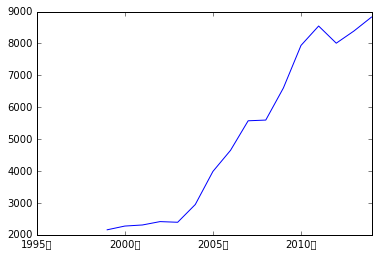

In [7]:
fj.ix['TianJin'][::-1].plot() # 倒序显示走势图

下面我们横向对比一下2014年各省的价格分布:

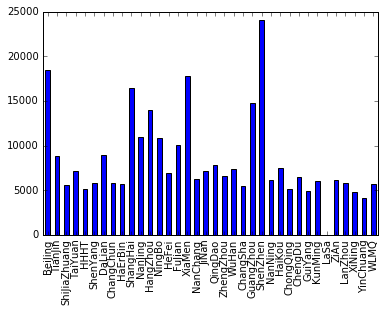

In [8]:
fj['2014年'].plot(kind='bar') #使用柱状图

让我们再来计算以下, 2004年到2014年这十年间, 哪个省的房价涨的最厉害(哪里炒房地产的最赚钱).

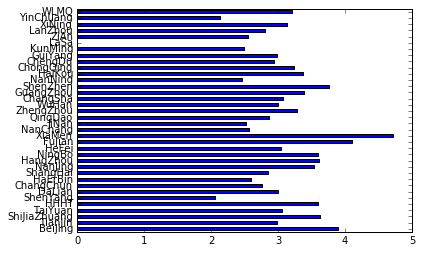

In [22]:
(fj['2014年']/fj['2004年']).plot(kind='barh')

可以看出厦门在短短的十年间房价翻了约5倍之多, 最低的沈阳房价也翻了两翻, 天津的房价涨了3倍. 

我们再来看看居民消费水平这十年有什么变化:

In [26]:
xf = pd.read_table('https://raw.githubusercontent.com/logicgogh/Scientific-oriented/master/xiaofei.txt') #数据来自国家统计局

In [27]:
xf

,指标,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年
0,居民消费水平(元),17806,16190,14699,13134,10919,9514,8707,7572,6416,5771


可以计算出居民消费水平在十年间的增幅为:

In [71]:
zf = xf['2014年']/xf['2005年']
print(zf)

0    3.085427
dtype: float64
